In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np

In [9]:
class MLP(nn.Module):
    def __init__(self, input_dim):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_dim, 2)  
        self.fc2 = nn.Linear(2,1)          
    
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))
        return x

In [45]:
def train_mlp(model, criterion, optimizer, data, targets, epochs=1000):
    for epoch in range(epochs):
        model.train()
        
        optimizer.zero_grad()
        
        # Forward pass
        outputs = model(data)
        loss = criterion(outputs, targets)
        
        # Backward pass and optimization
        loss.backward()
        optimizer.step()
        
        if (epoch+1) % 10000 == 0:
            print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

In [46]:
# Predict outputs
def test_mlp(model, data):
    model.eval()
    with torch.no_grad():
        outputs = model(data)
        predicted = outputs.round().squeeze()
        return predicted

In [47]:
# Sample data (XOR logic gate)
xor_data = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float32)
xor_targets = torch.tensor([[0], [1], [1], [0]], dtype=torch.float32)

In [48]:
# Instantiate the MLP model
input_dim = xor_data.shape[1]
mlp = MLP(input_dim)

# Define loss and optimizer
criterion = nn.BCELoss()
optimizer = optim.Adam(mlp.parameters(), lr=0.1)

In [49]:
train_mlp(mlp, criterion, optimizer, xor_data, xor_targets, epochs=100000)

Epoch [10000/100000], Loss: 0.0000
Epoch [20000/100000], Loss: 0.0000
Epoch [30000/100000], Loss: 0.0000
Epoch [40000/100000], Loss: 0.0000
Epoch [50000/100000], Loss: 0.0000
Epoch [60000/100000], Loss: 0.0000
Epoch [70000/100000], Loss: 0.0000
Epoch [80000/100000], Loss: 0.0000
Epoch [90000/100000], Loss: 0.0000
Epoch [100000/100000], Loss: 0.0000


In [50]:
# Predicting outputs for XOR Gate
predicted = test_mlp(mlp, xor_data)
print(f'Predicted: {predicted.numpy()}')
print(f'Targets: {xor_targets.squeeze().numpy()}')

Predicted: [0. 1. 1. 0.]
Targets: [0. 1. 1. 0.]


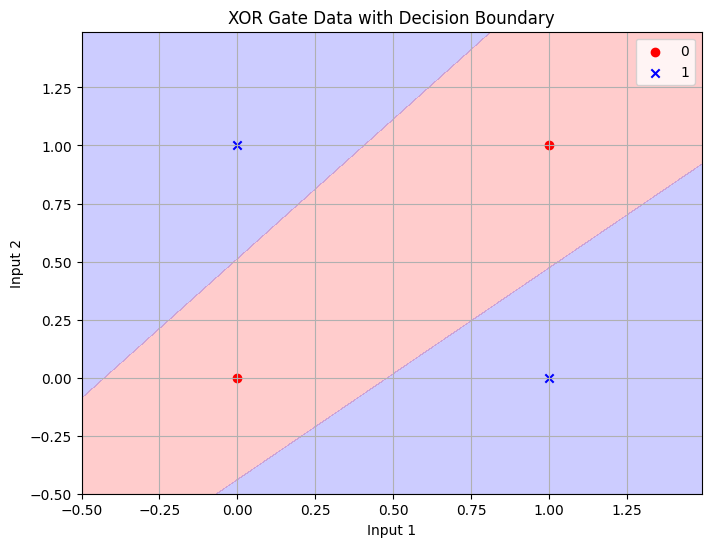

In [51]:
plt.figure(figsize=(8, 6))

# Scatter plot for XOR gate data
for i in range(xor_data.shape[0]):
    if xor_targets[i] == 0:
        plt.scatter(xor_data[i, 0].item(), xor_data[i, 1].item(), color='red', marker='o', label='0' if i == 0 else "")
    else:
        plt.scatter(xor_data[i, 0].item(), xor_data[i, 1].item(), color='blue', marker='x', label='1' if i == 1 else "")

# Generate a grid of points
x_min, x_max = xor_data[:, 0].min() - 0.5, xor_data[:, 0].max() + 0.5
y_min, y_max = xor_data[:, 1].min() - 0.5, xor_data[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
grid = torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype=torch.float32)

# Predict outputs for the grid points
with torch.no_grad():
    zz = mlp(grid).reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, zz, levels=[0, 0.5, 1], alpha=0.2, colors=['red', 'blue'])

plt.title('XOR Gate Data with Decision Boundary')
plt.xlabel('Input 1')
plt.ylabel('Input 2')
plt.legend()
plt.grid(True)
plt.show()